In [66]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [67]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [69]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
Base.metadata.create_all(engine)

In [70]:
from sqlalchemy.orm import Session 


In [71]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [72]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [73]:
# Save references to each table
station = Base.classes.station 
measurement = Base.classes.measurement 

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [75]:
# Find the most recent date in the data set.

In [76]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

#the latest date

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, 
      measurement.prcp]
prcpdata = session.query(*sel).\
    filter(measurement.date < '2017-08-23').\
    filter(measurement.date >'2016-08-23').\
    order_by(measurement.date.desc()).all()


#for x in prcpdata:
    #print(x.date, x.prcp)
prcpdata

[('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017

In [ ]:
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [94]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(query_date)

2016-08-23


In [96]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by data
# Use Pandas Plotting with Matplotlib to plot the data

Text(0, 0.5, 'Inches')

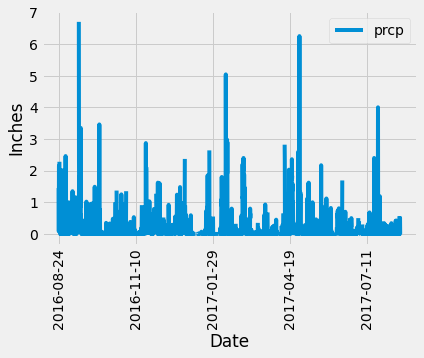

In [104]:
df = pd.DataFrame(prcpdata, columns=['date', 'prcp'])
df = df.sort_values("date")
df.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [106]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [103]:
# Design a query to calculate the total number stations in the dataset
totalstations = session.query(station).count()

totalstations

9

In [148]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


total_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()



total_count

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [159]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [measurement.station, 
      func.min(measurement.tobs), 
      func.max(measurement.tobs), 
      func.avg(measurement.tobs)]

tobs_query = session.query(*sel).\
    filter(measurement.station == "USC00519281").\
    group_by(measurement.tobs).all()



tobs_query

[('USC00519281', 54.0, 54.0, 54.0),
 ('USC00519281', 56.0, 56.0, 56.0),
 ('USC00519281', 57.0, 57.0, 57.0),
 ('USC00519281', 58.0, 58.0, 58.0),
 ('USC00519281', 59.0, 59.0, 59.0),
 ('USC00519281', 60.0, 60.0, 60.0),
 ('USC00519281', 61.0, 61.0, 61.0),
 ('USC00519281', 62.0, 62.0, 62.0),
 ('USC00519281', 63.0, 63.0, 63.0),
 ('USC00519281', 64.0, 64.0, 64.0),
 ('USC00519281', 65.0, 65.0, 65.0),
 ('USC00519281', 66.0, 66.0, 66.0),
 ('USC00519281', 67.0, 67.0, 67.0),
 ('USC00519281', 68.0, 68.0, 68.0),
 ('USC00519281', 69.0, 69.0, 69.0),
 ('USC00519281', 70.0, 70.0, 70.0),
 ('USC00519281', 71.0, 71.0, 71.0),
 ('USC00519281', 72.0, 72.0, 72.0),
 ('USC00519281', 73.0, 73.0, 73.0),
 ('USC00519281', 74.0, 74.0, 74.0),
 ('USC00519281', 75.0, 75.0, 75.0),
 ('USC00519281', 76.0, 76.0, 76.0),
 ('USC00519281', 77.0, 77.0, 77.0),
 ('USC00519281', 78.0, 78.0, 78.0),
 ('USC00519281', 79.0, 79.0, 79.0),
 ('USC00519281', 80.0, 80.0, 80.0),
 ('USC00519281', 81.0, 81.0, 81.0),
 ('USC00519281', 82.0, 82.0,

In [178]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [measurement.station,
       measurement.date,
       measurement.tobs
      ]

tobs12_query = session.query(*sel).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date < '2017-08-23').\
    filter(measurement.date >'2016-08-23').all()  
    
tobs12_query

[('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC00519281', '2016-09-18', 78.0),
 ('USC005192

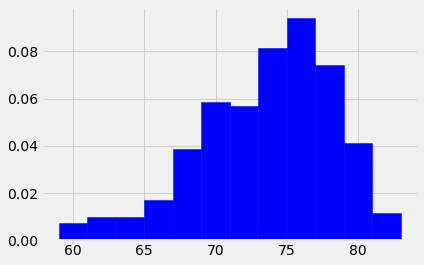

In [179]:
tobs_df = pd.DataFrame(tobs12_query, columns=['station', 'date', 'tobs'])

#plt.hist(df, edgecolor="red", bins=12)

plt.hist(tobs_df["tobs"], bins=12 , density=True, edgecolor="blue", color="blue")

plt.show()


# Close session

In [ ]:
# Close Session
session.close()